In [2]:
#data loading
import pandas as pd
filename="/content/storms.csv"
a=pd.read_csv(str(filename))

print(a)

       rownames    name  year  month  day  hour   lat  long  \
0             1     Amy  1975      6   27     0  27.5 -79.0   
1             2     Amy  1975      6   27     6  28.5 -79.0   
2             3     Amy  1975      6   27    12  29.5 -79.0   
3             4     Amy  1975      6   27    18  30.5 -79.0   
4             5     Amy  1975      6   28     0  31.5 -78.8   
...         ...     ...   ...    ...  ...   ...   ...   ...   
19532     19533  Nicole  2022     11   10    19  29.2 -83.0   
19533     19534  Nicole  2022     11   11     0  30.1 -84.0   
19534     19535  Nicole  2022     11   11     6  31.2 -84.6   
19535     19536  Nicole  2022     11   11    12  33.2 -84.6   
19536     19537  Nicole  2022     11   11    18  35.4 -83.8   

                    status  category  wind  pressure  
0      tropical depression       NaN    25      1013  
1      tropical depression       NaN    25      1013  
2      tropical depression       NaN    25      1013  
3      tropical depress

In [3]:
##Checking for null values
a.isna().sum()

rownames        0
name            0
year            0
month           0
day             0
hour            0
lat             0
long            0
status          0
category    14734
wind            0
pressure        0
dtype: int64

In [9]:
a["category"] = a["category"].fillna(0)

In [10]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
b=LabelEncoder()
target="status"

#transform string into int
transformColumns={1,8}
for x in transformColumns:
    a[a.columns[x]]=b.fit_transform(a[a.columns[x]])

print(a)

       rownames  name  year  month  day  hour   lat  long  status  category  \
0             1    45  1975      6   27     0  27.5 -79.0       6       0.0   
1             2    45  1975      6   27     6  28.5 -79.0       6       0.0   
2             3    45  1975      6   27    12  29.5 -79.0       6       0.0   
3             4    45  1975      6   27    18  30.5 -79.0       6       0.0   
4             5    45  1975      6   28     0  31.5 -78.8       6       0.0   
...         ...   ...   ...    ...  ...   ...   ...   ...     ...       ...   
19532     19533   209  2022     11   10    19  29.2 -83.0       7       0.0   
19533     19534   209  2022     11   11     0  30.1 -84.0       7       0.0   
19534     19535   209  2022     11   11     6  31.2 -84.6       6       0.0   
19535     19536   209  2022     11   11    12  33.2 -84.6       6       0.0   
19536     19537   209  2022     11   11    18  35.4 -83.8       3       0.0   

       wind  pressure  
0        25      1013  
1  

In [11]:
from matplotlib import pyplot as plt

index=2
plt.plot(a[a.columns[index]],a[str(target)])

<BarContainer object of 19537 artists>

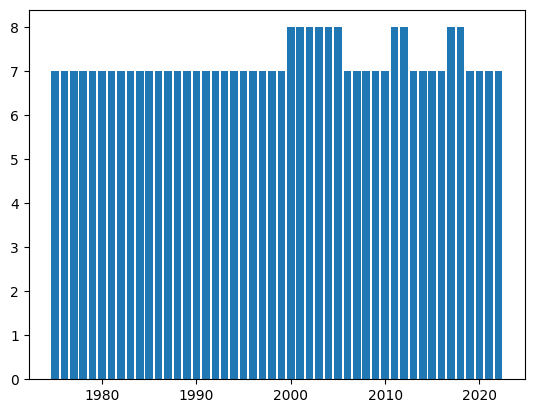

In [12]:
plt.bar(a[a.columns[2]],a[str(target)])

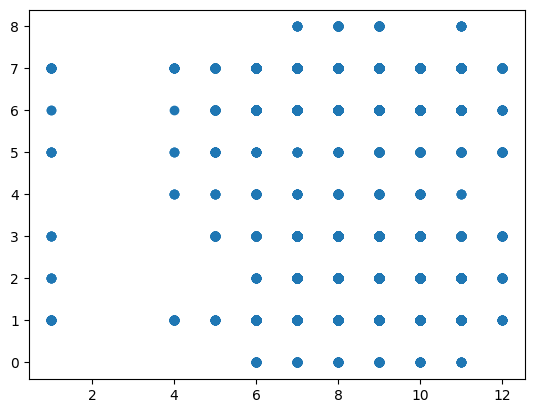

In [13]:
plt.scatter(a[a.columns[3]], a[str(target)])

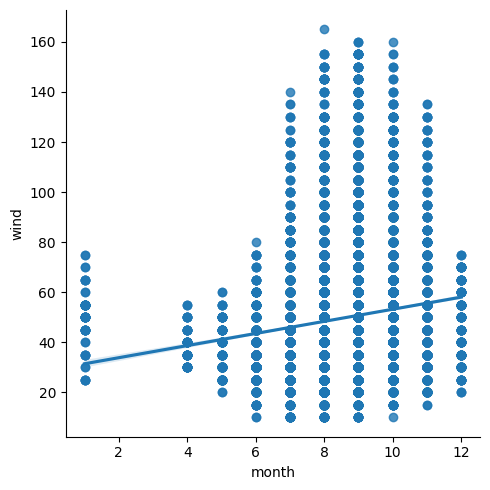

In [14]:
import seaborn as sns
#a["Purpose"] = pd.to_numeric(a["Purpose"])
#a["Count"] = pd.to_numeric(a["Count"])
sns.lmplot(x="month",y="wind",data=a)

<Axes: xlabel='day', ylabel='status'>

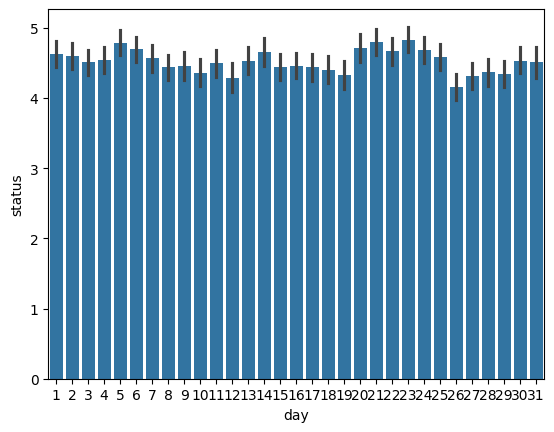

In [15]:
sns.barplot(x=a.columns[4],y=str(target),data=a)

<Axes: xlabel='wind', ylabel='status'>

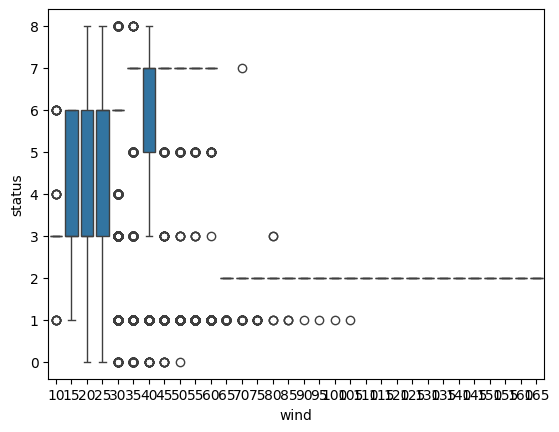

In [16]:
sns.boxplot(x=a.columns[10],y=str(target),data=a)

<ipython-input-17-61a72522baee>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a[str(target)])


<Axes: xlabel='status', ylabel='Density'>

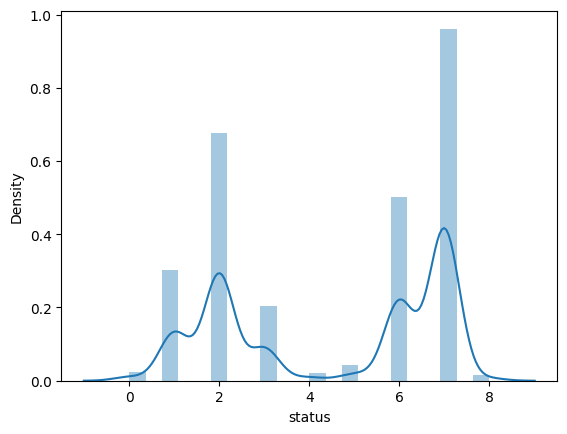

In [17]:
sns.distplot(a[str(target)])

<Axes: xlabel='month', ylabel='Density'>

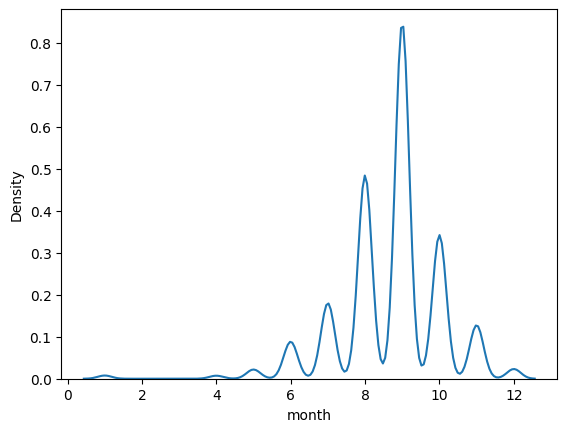

In [18]:
sns.kdeplot(a[a.columns[3]])

<Axes: xlabel='year', ylabel='count'>

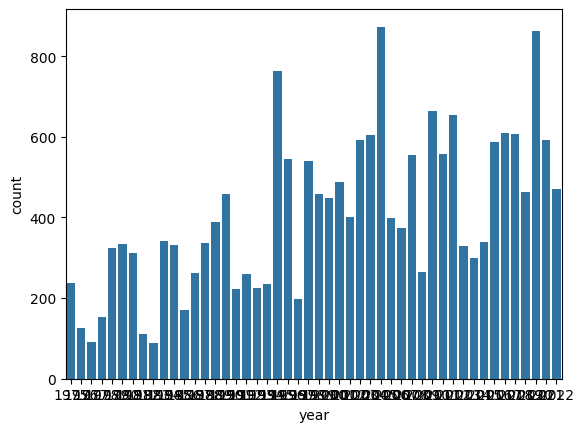

In [19]:
sns.countplot(x=a.columns[2],data=a)

<Axes: >

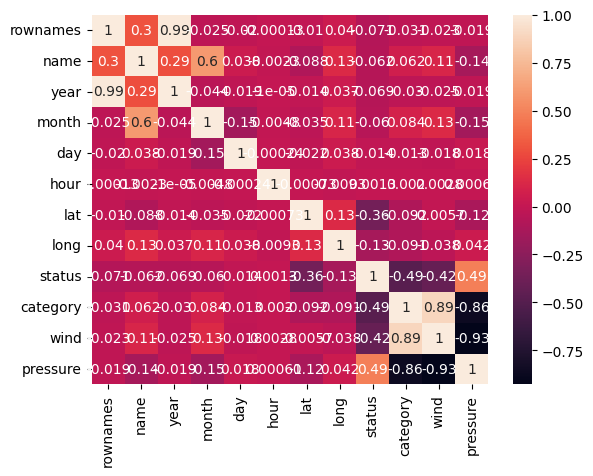

In [20]:
data=a.select_dtypes(include=np.number).corr()
sns.heatmap(data, annot=True)

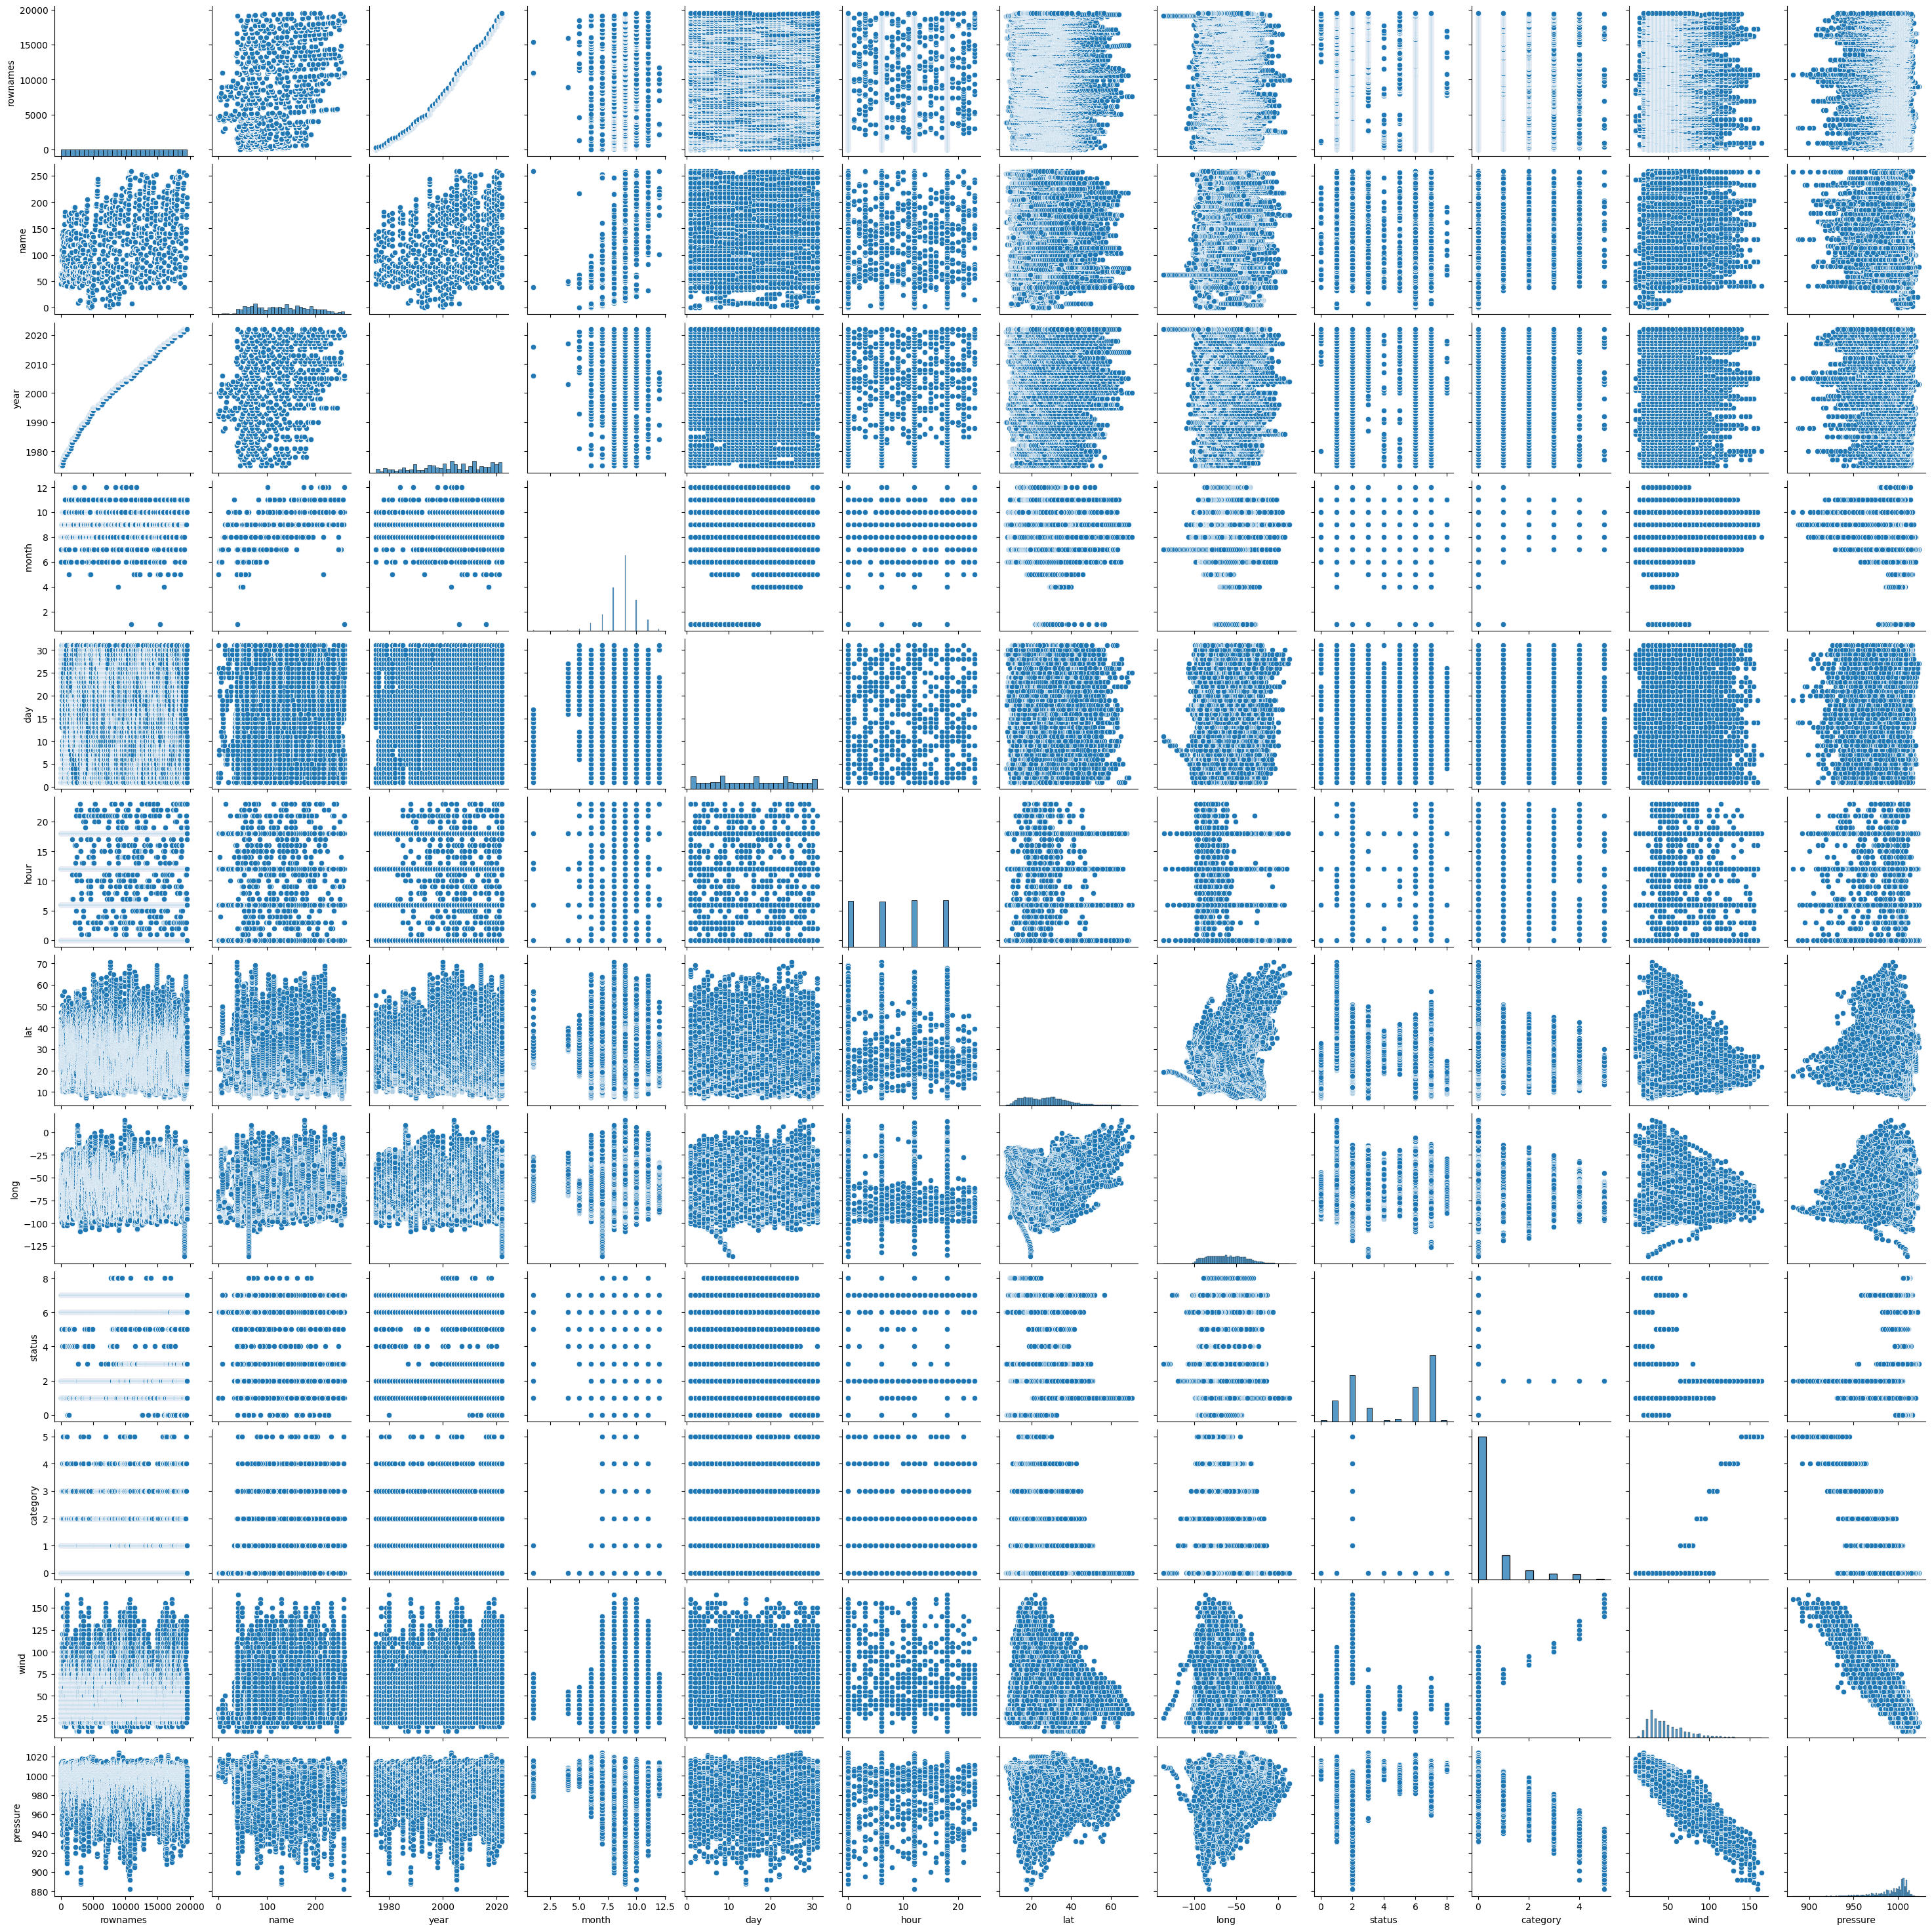

In [21]:
sns.pairplot(data=a)

In [22]:
#data split

y=a[str(target)]
x=a.iloc[:,a.columns != str(target)]


print(x)

       rownames  name  year  month  day  hour   lat  long  category  wind  \
0             1    45  1975      6   27     0  27.5 -79.0       0.0    25   
1             2    45  1975      6   27     6  28.5 -79.0       0.0    25   
2             3    45  1975      6   27    12  29.5 -79.0       0.0    25   
3             4    45  1975      6   27    18  30.5 -79.0       0.0    25   
4             5    45  1975      6   28     0  31.5 -78.8       0.0    25   
...         ...   ...   ...    ...  ...   ...   ...   ...       ...   ...   
19532     19533   209  2022     11   10    19  29.2 -83.0       0.0    40   
19533     19534   209  2022     11   11     0  30.1 -84.0       0.0    35   
19534     19535   209  2022     11   11     6  31.2 -84.6       0.0    30   
19535     19536   209  2022     11   11    12  33.2 -84.6       0.0    25   
19536     19537   209  2022     11   11    18  35.4 -83.8       0.0    25   

       pressure  
0          1013  
1          1013  
2          1013  
3  

In [23]:
print(y)

0        6
1        6
2        6
3        6
4        6
        ..
19532    7
19533    7
19534    6
19535    6
19536    3
Name: status, Length: 19537, dtype: int64


In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [25]:
print(x_train)

       rownames  name  year  month  day  hour   lat   long  category  wind  \
7611       7612    12  2000      8   10     6  28.3  -79.3       0.0    30   
1185       1186   163  1980     10    3    18  38.5  -21.4       0.0    25   
512         513    96  1978      9    1    18  31.1  -72.3       3.0   110   
4507       4508    91  1992     10    2    12  27.5  -67.0       0.0    45   
3229       3230    42  1989      6   27     6  30.2  -95.3       0.0    35   
...         ...   ...   ...    ...  ...   ...   ...    ...       ...   ...   
11735     11736    55  2008      7   14     6  31.0  -63.5       0.0    55   
13800     13801    69  2012      6   23    12  40.0  -45.0       0.0    35   
19114     19115    62  2022      7    5     6  14.9 -102.4       2.0    95   
11689     11690    51  2008      6    2     0  17.6  -91.1       0.0    25   
2954       2955    80  1988      9    2    18  20.8  -96.6       1.0    65   

       pressure  
7611       1010  
1185       1007  
512      

In [26]:
print(y_train)

7611     6
1185     1
512      2
4507     7
3229     7
        ..
11735    7
13800    1
19114    2
11689    3
2954     2
Name: status, Length: 15629, dtype: int64


In [27]:
print(x_test)

       rownames  name  year  month  day  hour   lat  long  category  wind  \
15404     15405    62  2016      5   31    12  33.2 -78.4       0.0    25   
1798       1799    51  1984      9    3     0  18.9 -61.8       0.0    30   
11163     11164   115  2006      9   19     0  62.0 -34.0       0.0    50   
18231     18232   257  2020      9   19     6  12.8 -36.2       0.0    35   
18209     18210    58  2020      9   22     6  28.6 -96.6       0.0    40   
...         ...   ...   ...    ...  ...   ...   ...   ...       ...   ...   
12065     12066   169  2008      9    6     6  16.5 -36.4       0.0    30   
11991     11992   152  2008      9    2    12  18.7 -44.3       0.0    50   
17897     17898   186  2020      8   27     6  29.8 -93.3       4.0   130   
7978       7979    42  2001      6   12     0  31.3 -87.4       0.0    25   
14076     14077   189  2012      9    8    12  28.3 -62.5       0.0    55   

       pressure  
15404      1007  
1798       1008  
11163       982  
182

In [28]:
print(y_test)

15404    3
1798     6
11163    1
18231    7
18209    7
        ..
12065    3
11991    7
17897    2
7978     4
14076    7
Name: status, Length: 3908, dtype: int64


In [29]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(x_train,y_train)
ypred=model.predict(x_test)

In [30]:
print(ypred)

[ 4.30642566  6.09426367  1.41906853 ... -0.21156815  4.97036547
  5.17264456]


In [35]:
print(model.predict([[15405,62,2016,5,31,12,33.2,-78.4,0.0,25,1007]]))

[4.30642566]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [31]:
from sklearn.tree import DecisionTreeRegressor
b=DecisionTreeRegressor()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [32]:
print(ypred)

[3. 6. 1. ... 2. 4. 7.]


In [36]:
print(model.predict([[15405,62,2016,5,31,12,33.2,-78.4,0.0,25,1007]]))

[4.30642566]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [33]:
from sklearn.ensemble import RandomForestRegressor
b=RandomForestRegressor()
b.fit(x_train,y_train)
ypred=b.predict(x_test)

In [34]:
print(ypred)

[3.42 6.   1.   ... 2.   4.39 7.  ]


In [37]:
print(model.predict([[15405,62,2016,5,31,12,33.2,-78.4,0.0,25,1007]]))

[4.30642566]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
